## Example linear regression. 

In this example, we will use a linear regression model to gain insight on data. This is an application from diabetes research. 

The data is composed of multiple body measures taken at time = 0, and a clinician score indicating the disease severity one year after the measures were taken. That is, we are trying to understand if certain body measures can predict the clinical state of patients with diabetes.  

### Diabetes dataset 

Number of Instances: 442

**Inputs (Features)**: 
- age: age in years
- sex: 1 - male | 2- female
- bmi: body mass index
- bp: average blood pressure
- s1: tc, total serum cholesterol
- s2: ldl, low-density lipoproteins
- s3: hdl, high-density lipoproteins
- s4: tch, total cholesterol / HDL
- s5: ltg, serum triglycerides level
- s6: glu, blood sugar level

Note that
> high-values of tc, ldl, and hdl is considered good or healthy, as these factors help to reduce choresterol level

> high-values of tch and ltg are considered bad or unhealthy

**Output**: Disease progression one year after the measures were taken - larger values indicate worst condition


The objective of this dataset is to predict the disease progression one year after based on some physological measurements. This is a regression problem. 

In [1]:
#load the data 
import sklearn.datasets
import pandas as pd
import numpy as np

data = pd.read_csv('diabetes.txt', sep='\t', lineterminator='\n')

data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
#separate the data into input and output
columns = list(data.columns)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
pd.DataFrame(np.column_stack((columns[:-1],X.mean(axis=0),X.std(axis=0))), columns = ['Feature', 'Mean', 'Std'])

,Feature,Mean,Std
0,AGE,48.51809954751131,13.094190207980025
1,SEX,1.4683257918552035,0.4989957359922028
2,BMI,26.37579185520362,4.413120855492464
3,BP,94.64701357466062,13.815628311857534
4,S1,189.14027149321268,34.568880126921364
5,S2,115.43914027149322,30.378657550243798
6,S3,49.78846153846154,12.919562419379737
7,S4,4.070248868778281,1.288989285051803
8,S5,4.641410859728507,0.5217992869003063
9,S6,91.26018099547511,11.48332247173548


# The data is not normalized!!!

In [35]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rc
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':16})

#we will use 15% of the data to test the model

n_test = int(len(y)*.15)
n_train= len(y)-n_test
random_seed = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train, test_size=n_test, random_state=random_seed)


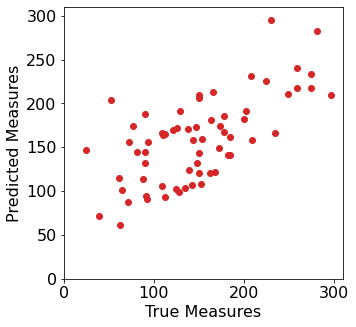

In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#create pipeline that includes scaling and gradient descent
lin_reg = Pipeline([('scaler', StandardScaler()),
                ('SGD', SGDRegressor())])
#fit the model with data
lin_reg.fit(X_train,y_train);
y_pred = lin_reg.predict(X_test)

#plot the result
fig,ax = plt.subplots(1,1,figsize=(5,5))
plt.plot(y_test, y_pred,'o', lw = 3, color='tab:red');
plt.xlabel('True Measures', fontdict={'family':'sans-serif','size':16})
plt.ylabel('Predicted Measures', fontdict={'family':'sans-serif','size':16})
plt.xlim([0, 310])
plt.ylim([0 ,310])
plt.show();


Is this a good prediction or a bad prediction? What do you expect to see in case of a good or bad prediction? 

## Quantifying prediction accuracy

### Option 1 : RMSE 
The RMSE is a good initial option. The RMSE is defined as 
$$
RMSE = \frac{1}{N}\sum_{i=0}^{N}\left(\hat{y}[i] - y[i]\right)^{2}
$$
where $ y[i]$ is the measured data and $\hat{y}[i]$ is the predicted data.

The RMSE is influenced by the signal's variance and is difficult to interpret.


### Option 2 : R2 score

The R2 score is a normalized version of the RMSE, if provides values between 0 and 1. The R2 score is defined as
$$
R2 \ score = 1 - \frac{\sum_{i=0}^{N}\left(\hat{y}[i] - y[i]\right)^{2}}{\sum_{i=0}^{N}\left(y[i] - \bar{y}\right)^{2}}
$$

where $\bar{y}$ is the mean of $ y[i]$.

Note that the R2 score can be negative. what do you think is the meaning of that? 


### Option 3 : Adjusted R2 score

The adjusted R2 score applies a penalty to the R2 score based on the number of features used for prediction. 

$$
adj \ R2 \ score = 1 - (1 - R2)\left[\frac{(N-1)}{(N-k-1)}\right]
$$

where $N$ is the number of samples, and $k$ is the number of features. 

The difference betwee the R2 score and the adjusted R2 score is:

- The R2 score will always improve by including additional columns to the $X$ matrix (additional inputs/features)
- The adj R2 score will improve only if the a new predictor decreases the RMSE

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

def adj_r2_score(r2_score, X): #function that computes the adjusted r2 score
    #get number of samples and regressor from X matrix
    N,k = X.shape
    
    return (1- ((1-r2_score)*(N-1)/(N-k-1)))

In [27]:
RMSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adj_r2 = adj_r2_score(r2,X_test)

print(f'RMSE = {RMSE:0.2f} \nR2 Score = {r2:0.2f} \nAdj R2 score = {adj_r2:0.2f}')

RMSE = 2554.57 
R2 Score = 0.43 
Adj R2 score = 0.32


## What can we learn from the model

Even if the model is not perfect, we can still learn from it (that is what data-scientist do!!!). Lets look at the model parameters and what they mean.

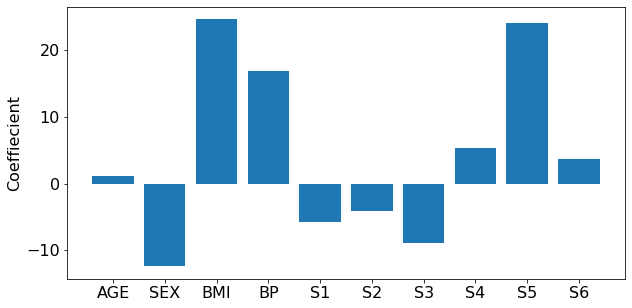

In [28]:
coefficients = lin_reg.named_steps['SGD'].coef_
fig,ax = plt.subplots(1,1,figsize=(10,5))
plt.bar(columns[:-1],coefficients)

plt.ylabel('Coeffiecient')
plt.show();

What can we learn from our linear model?

BMI, BP and S5 (serum triglycerides level) are the most important features - Similar to the results provided by RandomForrest.

In addition, we can conclude that:

1. Larger BMI results in worst diabetic condition one year after -- makes sense? 
2. Larger blood pressure results in worst diabetic condition one year after -- makes sense?
3. Larger serum triglycerides level results in worst diabetic condition one year after -- makes sense?

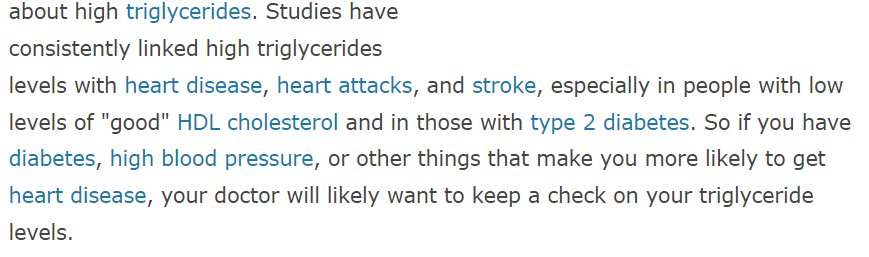

Furthermore, the model tell us that 

1. Larger high-density lipoproteins level results in better diabetic condition one year after -- makes sense?

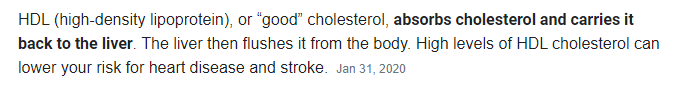

Finally, sex has a weird negative effect. What does it mean? 

In the original data, male sex had a value of 1 and female a value of 2. When we removed the mean, male sex resulted in a negative value and female in a positive value. Can you interprete the meaning of the **Sex** coefficient? 

### What if we use only the most important features as part of the model? 

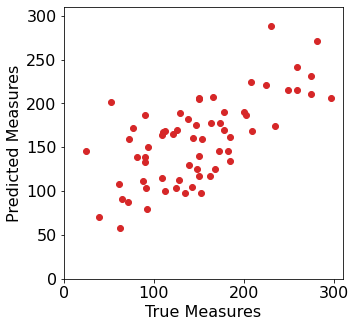

RMSE = 2490.50 
R2 Score = 0.44 
Adj R2 score = 0.34


In [37]:
selected_columns = [1,2,3,6,8]
#create pipeline that includes scaling and gradient descent
lin_reg = Pipeline([('scaler', StandardScaler()),
                ('SGD', SGDRegressor())])
lin_reg.fit(X_train[:,selected_columns],y_train);
y_pred = lin_reg.predict(X_test[:,selected_columns])


#plot the result
fig,ax = plt.subplots(1,1,figsize=(5,5))
plt.plot(y_test, y_pred,'o', lw = 3, color='tab:red');
plt.xlabel('True Measures', fontdict={'family':'sans-serif','size':16})
plt.ylabel('Predicted Measures', fontdict={'family':'sans-serif','size':16})
plt.xlim([0, 310])
plt.ylim([0 ,310])
plt.show();

#measures
RMSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
adj_r2 = adj_r2_score(r2,X_test)

print(f'RMSE = {RMSE:0.2f} \nR2 Score = {r2:0.2f} \nAdj R2 score = {adj_r2:0.2f}')